In [10]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import os

import gensim
from gensim import corpora
from gensim.models import LsiModel
import numpy as np
%matplotlib notebook

In [11]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

summary_dir = './Datasets/Summaries'
summaries = os.listdir(summary_dir)

In [12]:
def clean(doc):
    f = open(os.path.join(summary_dir, doc),"r")
    contents = f.read()

    stop_free = " ".join([i for i in contents.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    f.close()
    return normalized

In [13]:
doc_clean = [clean(doc).split() for doc in summaries] 

In [14]:
dictionary = corpora.Dictionary(doc_clean) 

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [15]:
lsamodel = LsiModel(doc_term_matrix, id2word = dictionary)  # train model
print(lsamodel.print_topics(-1))

[(0, '-0.243*"word" + -0.215*"evaluation" + -0.214*"rule" + -0.205*"language" + -0.197*"sentence" + -0.181*"grammar" + -0.178*"interpretation" + -0.165*"task" + -0.159*"model" + -0.156*"set"'), (1, '0.426*"evaluation" + 0.323*"assessment" + 0.308*"task" + 0.256*"user" + 0.232*"technology" + 0.218*"project" + 0.189*"data" + -0.185*"interpretation" + 0.170*"system" + -0.164*"sentence"'), (2, '-0.425*"word" + 0.404*"interpretation" + -0.261*"rule" + 0.225*"sentence" + 0.223*"clause" + 0.221*"reading" + 0.169*"ellipsis" + 0.165*"source" + -0.160*"model" + 0.159*"ambiguity"'), (3, '-0.549*"rule" + 0.479*"word" + -0.335*"grammar" + 0.259*"model" + -0.215*"feature" + -0.138*"structure" + -0.131*"tree" + 0.100*"corpus" + 0.083*"speech" + 0.081*"probability"'), (4, '0.390*"discourse" + -0.320*"clause" + -0.288*"rule" + -0.260*"reading" + -0.253*"source" + -0.232*"ellipsis" + -0.194*"word" + 0.156*"model" + 0.130*"theory" + 0.124*"ambiguity"'), (5, '0.514*"rule" + -0.355*"feature" + -0.303*"term

In [16]:
conceptMap = dict()
conceptMapWeights = dict()
for tup in lsamodel.print_topics(-1):
    s = tup[1]
    s = s.split('+')
    l = []
    for ele in s:
        l.append(ele[:-1])
    l1 = []
    l2 = []
    for ele in l:
        t = ele.split('"')
        l1.append(t[1])
        l2.append(float(t[0][:-1]))
    conceptMap[tup[0]] = l1
    conceptMapWeights[tup[0]] = l2

In [17]:
print(conceptMap)

{0: ['word', 'evaluation', 'rule', 'language', 'sentence', 'grammar', 'interpretation', 'task', 'model', 'set'], 1: ['evaluation', 'assessment', 'task', 'user', 'technology', 'project', 'data', 'interpretation', 'system', 'sentence'], 2: ['word', 'interpretation', 'rule', 'sentence', 'clause', 'reading', 'ellipsis', 'source', 'model', 'ambiguity'], 3: ['rule', 'word', 'grammar', 'model', 'feature', 'structure', 'tree', 'corpus', 'speech', 'probability'], 4: ['discourse', 'clause', 'rule', 'reading', 'source', 'ellipsis', 'word', 'model', 'theory', 'ambiguity'], 5: ['rule', 'feature', 'term', 'tree', 'grammar', 'structure', 'discourse', 'interpretation', 'word', 'node'], 6: ['noun', 'phrase', 'term', 'pronoun', 'language', 'possessive', 'ambiguity', 'interpretation', 'grammar', 'theory'], 7: ['term', 'tree', 'dictionary', 'model', 'feature', 'word', 'noun', 'phrase', 'grammar', 'discipline'], 8: ['model', 'sentence', 'noun', 'discourse', 'agent', 'belief', 'ambiguity', 'phrase', 'word',

In [18]:
print(conceptMapWeights)

{0: [-0.243, -0.215, -0.214, -0.205, -0.197, -0.181, -0.178, -0.165, -0.159, -0.156], 1: [0.426, 0.323, 0.308, 0.256, 0.232, 0.218, 0.189, -0.185, 0.17, -0.164], 2: [-0.425, 0.404, -0.261, 0.225, 0.223, 0.221, 0.169, 0.165, -0.16, 0.159], 3: [-0.549, 0.479, -0.335, 0.259, -0.215, -0.138, -0.131, 0.1, 0.083, 0.081], 4: [0.39, -0.32, -0.288, -0.26, -0.253, -0.232, -0.194, 0.156, 0.13, 0.124], 5: [0.514, -0.355, -0.303, -0.264, -0.223, -0.193, 0.174, 0.168, 0.146, -0.126], 6: [-0.537, -0.537, -0.18, -0.166, 0.157, -0.147, 0.142, 0.141, 0.138, 0.109], 7: [-0.64, 0.256, -0.225, 0.183, -0.176, -0.154, 0.14, 0.135, 0.115, -0.115], 8: [0.384, -0.279, -0.268, 0.217, 0.214, 0.202, -0.174, -0.166, -0.146, 0.141], 9: [0.544, -0.433, 0.249, 0.218, 0.204, -0.164, 0.162, -0.142, 0.129, -0.128], 10: [-0.345, 0.333, -0.304, -0.285, 0.279, -0.241, 0.179, 0.141, 0.121, 0.118], 11: [0.319, -0.304, -0.243, -0.231, 0.186, -0.181, -0.172, -0.171, 0.164, -0.148], 12: [-0.394, -0.351, 0.235, 0.196, -0.18, -0.1

``` Creating Training Data for Clustering ```

In [19]:
trainingClustering = conceptMapWeights.values()

In [20]:
trainingClustering = list(trainingClustering)

In [21]:
trainingClustering

[[-0.243,
  -0.215,
  -0.214,
  -0.205,
  -0.197,
  -0.181,
  -0.178,
  -0.165,
  -0.159,
  -0.156],
 [0.426, 0.323, 0.308, 0.256, 0.232, 0.218, 0.189, -0.185, 0.17, -0.164],
 [-0.425, 0.404, -0.261, 0.225, 0.223, 0.221, 0.169, 0.165, -0.16, 0.159],
 [-0.549, 0.479, -0.335, 0.259, -0.215, -0.138, -0.131, 0.1, 0.083, 0.081],
 [0.39, -0.32, -0.288, -0.26, -0.253, -0.232, -0.194, 0.156, 0.13, 0.124],
 [0.514, -0.355, -0.303, -0.264, -0.223, -0.193, 0.174, 0.168, 0.146, -0.126],
 [-0.537, -0.537, -0.18, -0.166, 0.157, -0.147, 0.142, 0.141, 0.138, 0.109],
 [-0.64, 0.256, -0.225, 0.183, -0.176, -0.154, 0.14, 0.135, 0.115, -0.115],
 [0.384, -0.279, -0.268, 0.217, 0.214, 0.202, -0.174, -0.166, -0.146, 0.141],
 [0.544, -0.433, 0.249, 0.218, 0.204, -0.164, 0.162, -0.142, 0.129, -0.128],
 [-0.345, 0.333, -0.304, -0.285, 0.279, -0.241, 0.179, 0.141, 0.121, 0.118],
 [0.319, -0.304, -0.243, -0.231, 0.186, -0.181, -0.172, -0.171, 0.164, -0.148],
 [-0.394, -0.351, 0.235, 0.196, -0.18, -0.168, -0.163, 

In [22]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

<IPython.core.display.Javascript object>


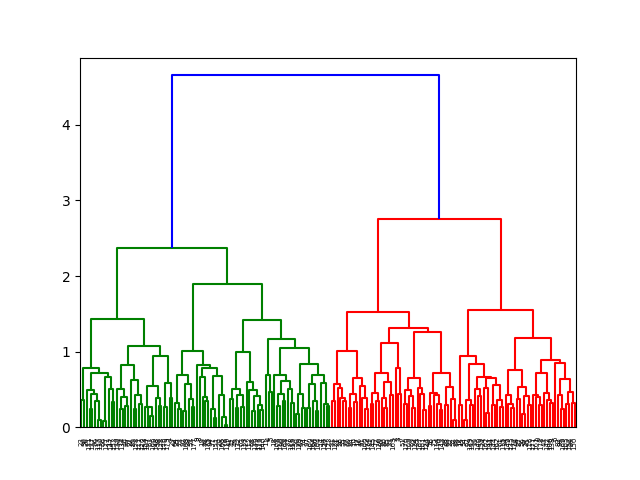

In [23]:
dendrogram = sch.dendrogram(sch.linkage(trainingClustering,method='ward'))

In [24]:
hc = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean',linkage = 'ward')

In [25]:
clusters = hc.fit_predict(trainingClustering)

In [26]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
for i in range(len(trainingClustering)):
    if clusters[i] == 0:
        cluster1.append(trainingClustering[i])
    elif clusters[i] == 1:
        cluster2.append(trainingClustering[i])
    elif clusters[i] == 2:
        cluster3.append(trainingClustering[i])
    elif clusters[i] == 3:
        cluster4.append(trainingClustering[i])

In [27]:
print("Length of Cluster 1:",len(cluster1))
print("Length of Cluster 2:",len(cluster2))
print("Length of Cluster 3:",len(cluster3))
print("Length of Cluster 4:",len(cluster4))

Length of Cluster 1: 57
Length of Cluster 2: 43
Length of Cluster 3: 46
Length of Cluster 4: 34


In [28]:
conceptWeightList = list(conceptMapWeights.values())
conceptWordsList = list(conceptMap.values())

In [29]:
cluster1Words = []
cluster2Words = []
cluster3Words = []
cluster4Words = []
for vec in cluster1:
    ind = conceptWeightList.index(vec)
    cluster1Words.append(conceptWordsList[ind])
for vec in cluster2:
    ind = conceptWeightList.index(vec)
    cluster2Words.append(conceptWordsList[ind])
for vec in cluster3:
    ind = conceptWeightList.index(vec)
    cluster3Words.append(conceptWordsList[ind])
for vec in cluster4:
    ind = conceptWeightList.index(vec)
    cluster4Words.append(conceptWordsList[ind])

In [30]:
# Only for WordCloud. Total Show-off!
cluster1Sents = [' '.join(ele) for ele in cluster1Words]
cluster2Sents = [' '.join(ele) for ele in cluster2Words]
cluster3Sents = [' '.join(ele) for ele in cluster3Words]
cluster4Sents = [' '.join(ele) for ele in cluster4Words]

In [31]:
cluster1Sents = ' '.join(cluster1Sents)
cluster2Sents = ' '.join(cluster2Sents)
cluster3Sents = ' '.join(cluster3Sents)
cluster4Sents = ' '.join(cluster4Sents)

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [33]:
# WordCloud for Cluster 1
wordcloud1 = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster1Sents) 

<IPython.core.display.Javascript object>


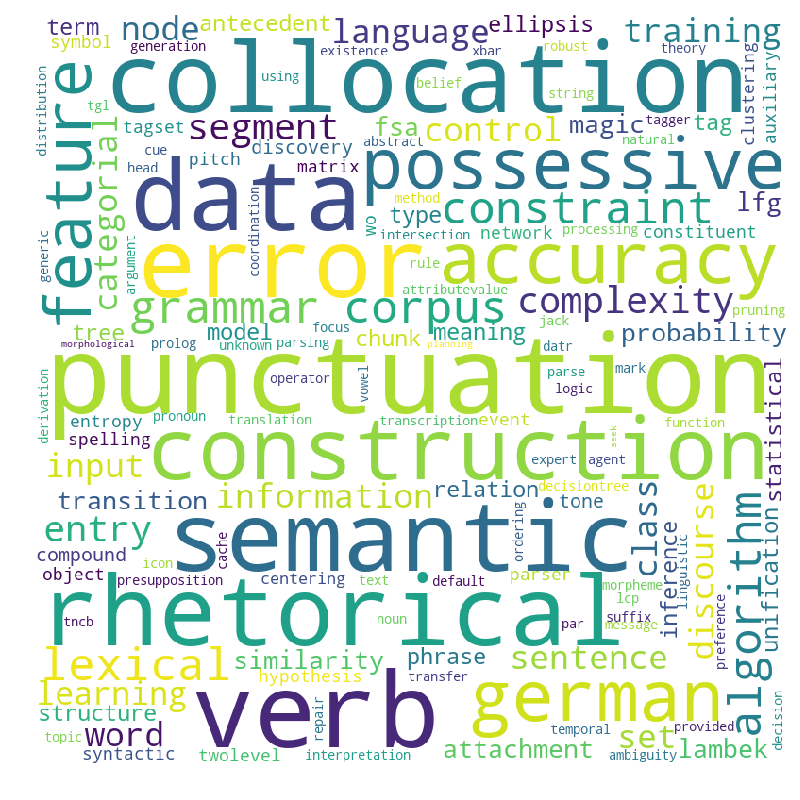

In [34]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<IPython.core.display.Javascript object>


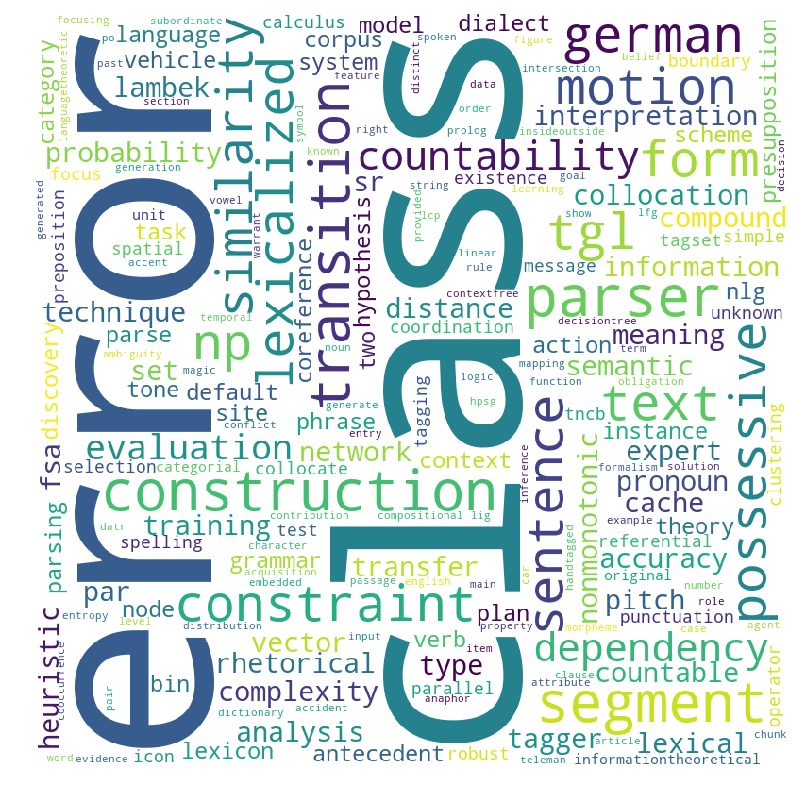

In [35]:
wordcloud2 = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster2Sents) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<IPython.core.display.Javascript object>


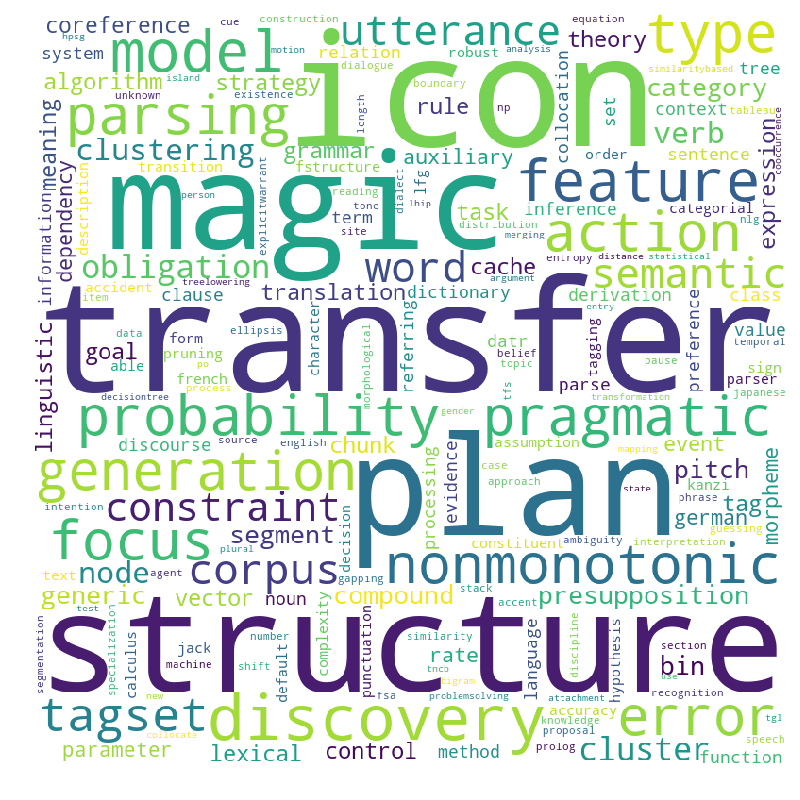

In [36]:
wordcloud3 = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster3Sents) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud3) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<IPython.core.display.Javascript object>


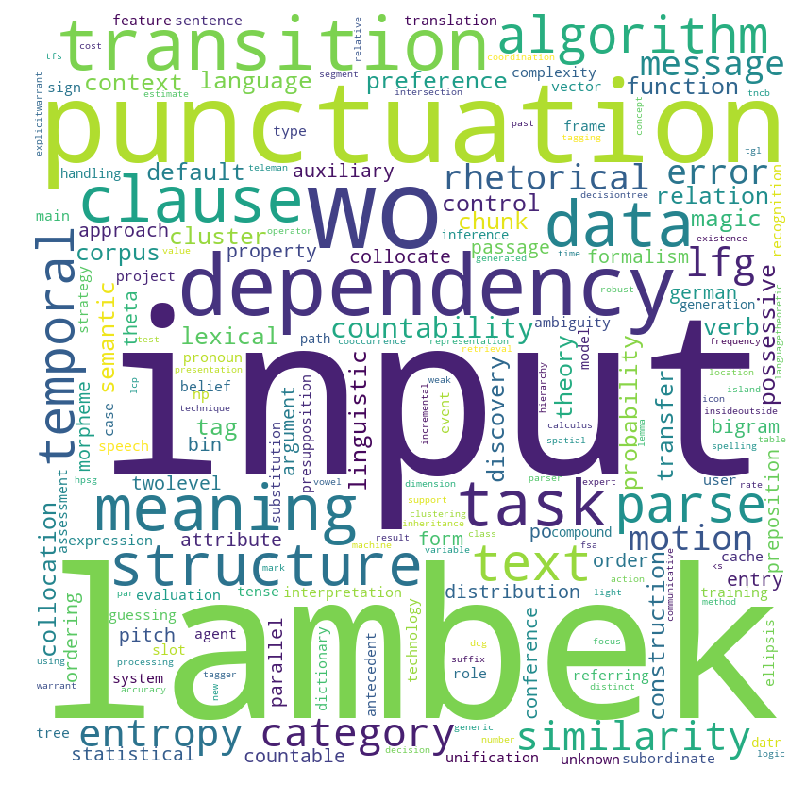

In [37]:
wordcloud4 = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster4Sents) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud4) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 